## Haar Cascade Sınıflandırması ile Araç Tespiti Algoritması

Bu Jupyter Notebook, görüntüler üzerinde araç tespiti yapmak için Haar Cascade sınıflandırma yöntemini içerir. Kodu çalıştırdığınızda, herhangi bir görüntüyü yükleyebilir ve araçların tespit edilmesini görebilirsiniz.

### Kullanım Talimatları:
1. Kodu çalıştırın ve herhangi bir görüntüyü yükleyin.
2. Kod, yüklediğiniz görüntü üzerinde araçları tespit etmek için Haar Cascade sınıflandırıcılarını kullanacaktır.
3. Görüntü üzerinde bulunan araçlar, sınırlayıcı kutularla işaretlenecektir.

#### Not: 
**Gönül rahatlığıyla "Ben bir robot değilim" seçeneğini işaretleyebilirsiniz.** Bu, araç tespiti algoritmasının doğruluğunu test etmek için geliştirilmiş bir seçenektir.

Bu Notebook, araç tespiti üzerine çalışmalarınızı hızlandırmak için kullanılabilir ve Haar Cascade sınıflandırma algoritmasının nasıl uygulandığını anlamak için bir başlangıç noktası olarak kullanılabilir.

### 1) Haar Cascade Sınıflandırıcıları Yükleme

Bu hücre, Haar Cascade Sınıflandırıcıları'nı yüklüyor ve araç tespiti için kullanılacak bir görüntüyü indiriyor.


In [1]:
import cv2
import urllib.request

# Haar Cascade Sınıflandırıcıları'nı indirme
haarcascade_url = 'https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml'
haar_name = "cars.xml"
urllib.request.urlretrieve(haarcascade_url, haar_name)

# Haar Cascade Sınıflandırıcıları'nı yükleme
detector = cv2.CascadeClassifier(haar_name)

# Araç tespiti için kullanılacak görüntüyü indirme
image_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/CV0101/Dataset/car-road-behind.jpg"
image_name = "car-road-behind.jpg"
urllib.request.urlretrieve(image_url, image_name)

('car-road-behind.jpg', <http.client.HTTPMessage at 0x2afefd6f430>)

### 2) Görüntü Gösterme Fonksiyonları

Bu hücre, görüntüleri göstermek için kullanılan yardımcı fonksiyonları içerir.


In [2]:
import matplotlib.pyplot as plt

def plt_show(image, title="", gray=False, size=(12, 10)):
    from pylab import rcParams
    
    temp = image 
    
    # Görüntüyü gri tonlamalı hale getirme
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    
    # Görüntü boyutunu değiştirme
    rcParams['figure.figsize'] = [10, 10]
    # Eksen işaretlerini kaldırma
    plt.axis("off")
    plt.title(title)
    plt.imshow(temp, cmap='gray')
    plt.show()

### 3) Araç Tespiti Fonksiyonu

Bu hücre, Haar Cascade Sınıflandırıcıları'nı kullanarak araçları tespit eden bir fonksiyon içerir.


In [3]:
def detect_obj(image):
    # Görüntüyü temizleme
    plt_show(image)
    
    # Araçları tespit etme
    object_list = detector.detectMultiScale(image)
    print(object_list)
    
    # Her bir araç için dikdörtgen çizme
    for obj in object_list: 
        (x, y, w, h) = obj
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2) # çizgi kalınlığı
        
    # Görüntüyü gösterme
    plt_show(image)

### 4) Araçları Tespit Etme

Bu hücre, belirli bir görüntü üzerinde araçları tespit etmek için Haar Cascade Sınıflandırıcıları'nı kullanır.


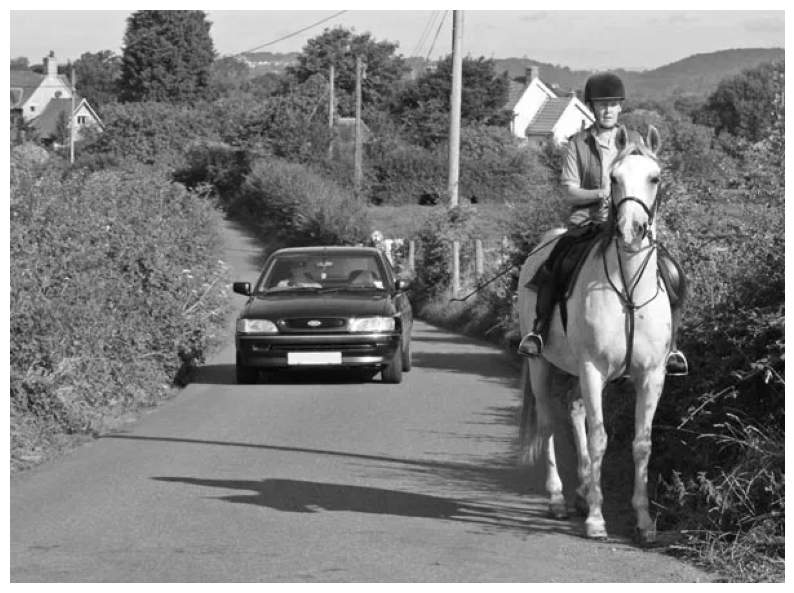

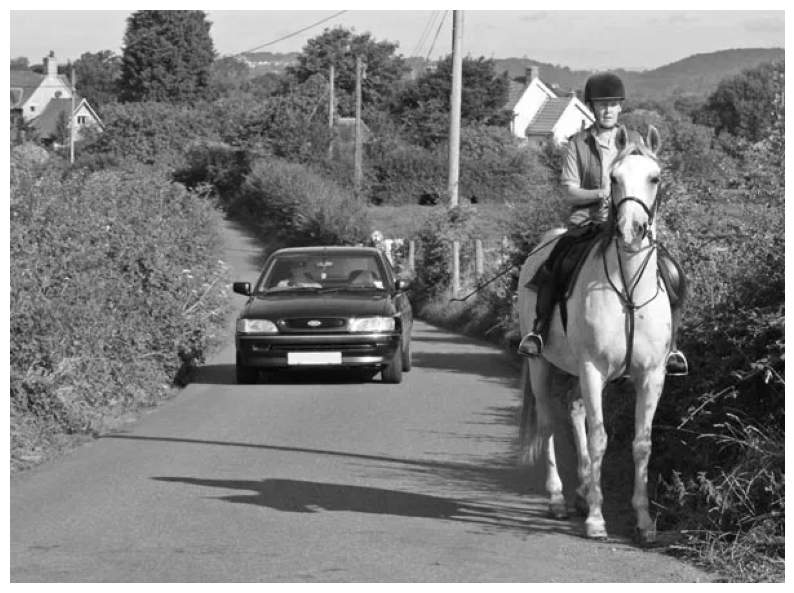

()


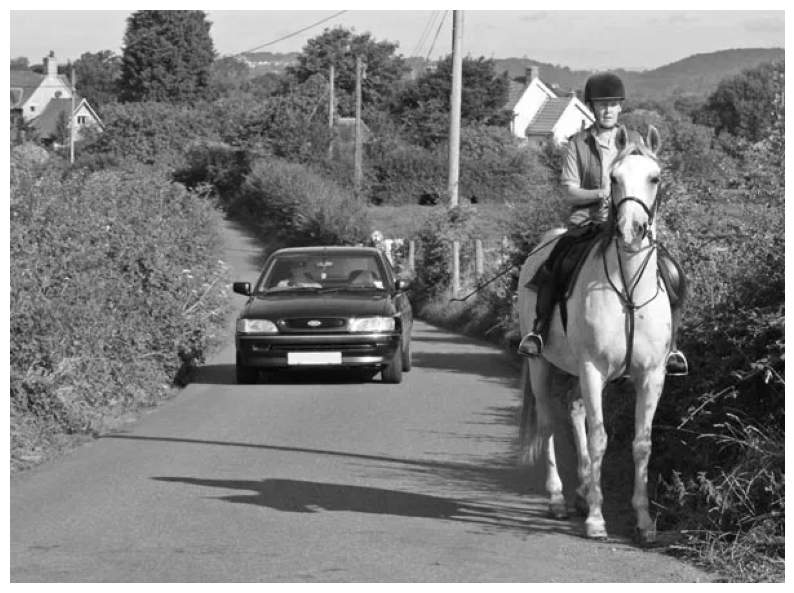

In [4]:
image = cv2.imread(image_name)
plt_show(image)

detect_obj(image)

### 5) Kendi Görüntünüzde Araçları Tespit Etme

Bu hücre, kullanıcının kendi görüntüsünü yükleyerek araçları tespit etmesine olanak tanır.


In [ ]:
# Kendi görüntünüzü yükleyin ve 'your_uploaded_file' ile değiştirin
my_image = cv2.imread("your_uploaded_file")

detect_obj(my_image)